In [5]:
import pandas as pd 
import numpy as np
import matplotlib as mp
import seaborn as snb
import math
import matplotlib.pyplot as plt
from datetime import date

!pip install -U pandasql
from pandasql import sqldf
mysql=lambda q: sqldf(q,globals())

Patients = pd.read_excel("HospitalDatabase .xlsx","Patients")
EDVisits = pd.read_excel("HospitalDatabase .xlsx","EDVisits")
AmbulatoryVisits = pd.read_excel("HospitalDatabase .xlsx","AmbulatoryVisits")
ReAdmissionRegistry = pd.read_excel("HospitalDatabase .xlsx","ReAdmissionRegistry")
Discharges = pd.read_excel("HospitalDatabase .xlsx","Discharges")
Providers = pd.read_excel("HospitalDatabase .xlsx","Providers")

EDUnique = pd.read_excel("HospitalDatabase .xlsx","EDUnique")
Merged = pd.merge(Patients, Discharges, on="PatientID")
Merged1= pd.merge(Patients, ReAdmissionRegistry, on="PatientID", how="left")




In [12]:
#####58. Display total count of patients service wise based on gender.
df = Merged.groupby(['Service','Gender']).size().unstack(fill_value=0)
df.head()

Gender,Female,Male
Service,,
Cardiology,41,54
General Medicine,114,149
Hospitalist,35,66
ICU,65,86
Neurology,34,31


In [30]:
##42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

##Providers.iloc [11:21] 
##df1 = Providers[(Providers["ProviderSpecialty"] == 'Surgery')]
df1 = Providers.loc[(Providers["ProviderSpecialty"] == 'Surgery')]


Number of Rows count is: 7


arr = np.array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])
print(arr[2, 0:2], [3, 0:2])

In [71]:
#####34. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.
arr=np.arange(1,31).reshape(6,5)
print(arr[2:4,0:2])

[[11 12]
 [16 17]]


In [81]:
arr=np.arange(1,31).reshape(6,5)
print(arr[0::1,1::3])

[[ 2  5]
 [ 7 10]
 [12 15]
 [17 20]
 [22 25]
 [27 30]]


In [94]:
###12. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.
mysql = lambda q: sqldf(q,globals())
mysql("Select ProviderName from Providers where ProviderName LIKE 'T%'")

,ProviderName
0,Ted Texas
1,Ted Green
2,Ted Black
3,Tyler Conner
4,Tony Creed
5,Trent Tye


In [96]:
##64. "Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)"

a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
res = np.dot(a,b)
print(res)

[[10 13]
 [28 40]]


In [167]:
##69Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

mysql = lambda q: sqldf(q,globals())
mysql("Select FirstName,LastName from Patients where FirstName LIKE ('%lau%') or LastName LIKE ('%lau%')")

,FirstName,LastName
0,Lauren,Gaskal
1,Lauren,Foort
2,Zulauf,Ellingham
3,Zulauf,LLC
4,Zulauf,Alvar
5,Zulauf,Manske
6,Zulauf,Bitcheno
7,Zulauf,O'Shavlan
8,Lemmy,Klausen
9,Jerrilyn,Klausen


In [183]:
##39.Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.
mysql = lambda q: sqldf(q,globals())

mysql("Select  FirstName, LastName, DateOfBirth from Patients p inner join EDUnique e on e.PatientID=p.PatientID and e.ReasonForVisit=('Migraine')")

,FirstName,LastName,DateOfBirth
0,Zonnya,Ab,1963-05-23 10:04:33.074000
1,Gan,Yu,1970-06-02 06:22:54.675000
2,Devlin,Michael,1976-04-15 02:52:09.762000
3,Joesph,Long,1979-12-04 16:45:56.080000
4,Gabriel,Joseph,1986-05-31 09:36:05.716000
...,...,...,...
111,Hauck,Rubbens,1963-11-16 03:31:38.929000
112,Barrows,Coupland,1979-10-31 18:28:35.483000
113,Knox,Group,1975-08-25 22:27:50.177000
114,Kuvalis,Coupland,1986-05-23 19:23:27.752000


In [185]:
##29. Calculate average LOS.
Discharges["ExpectedLOS"].mean()

8.82458915915616

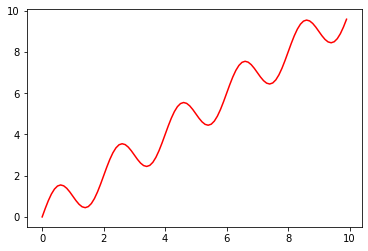

In [250]:
##13. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.
X = x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
plt.plot(X, y, color='r', label='sin')
plt.show()

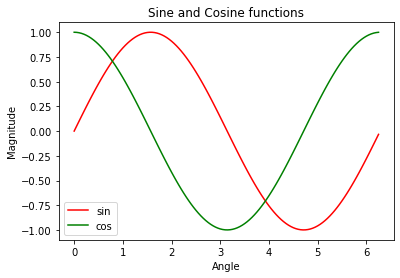

In [252]:
###61. Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).
X = np.arange(0, math.pi*2, 0.05)
y = np.sin(X)
z = np.cos(X)
plt.plot(X, y, color='r', label='sin')
plt.plot(X, z, color='g', label='cos')
plt.xlabel("Angle")
plt.ylabel("Magnitude")
plt.title("Sine and Cosine functions")
plt.legend()
plt.show()

In [259]:
##4. Display data by splitting age in 4 quartiles and labeling the quartiles.
Patients["Age"] = (pd.to_datetime("today").year-pd.to_datetime(Patients["DateOfBirth"]).dt.year)
df = pd.qcut(Patients['Age'], 4)
display (df) 



0        (56.0, 62.0]
1      (34.999, 42.0]
2        (42.0, 49.0]
3        (49.0, 56.0]
4        (56.0, 62.0]
            ...      
940    (34.999, 42.0]
941      (49.0, 56.0]
942    (34.999, 42.0]
943      (56.0, 62.0]
944      (49.0, 56.0]
Name: Age, Length: 945, dtype: category
Categories (4, interval[float64, right]): [(34.999, 42.0] < (42.0, 49.0] < (49.0, 56.0] < (56.0, 62.0]]

In [275]:
##80. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

#display (Providers['ProviderSpecialty'])
df = Providers.groupby("ProviderSpecialty").count()
df.head()

,ProviderID,ProviderName,ProviderDateOnStaff
ProviderSpecialty,,,
Cardiology,8,8,8
Pediatrics,9,9,9
PrimaryCare,16,16,16
Surgery,7,7,7


In [69]:
##78. Find reasonForVisit with highest count of acuity 5 patients.
mysql = lambda q: sqldf(q,globals())

mysql("Select ReasonForVisit from EDVisits where Acuity=5")

,ReasonForVisit
0,Car Accident
1,Chest Pain
2,Chest Pain
3,Chest Pain
4,Shortness of Breath
...,...
204,Shortness of Breath
205,Shortness of Breath
206,Shortness of Breath
207,Shortness of Breath


In [303]:
##28 Which reason of visit has maximum mortality rate.

mysql = lambda q: sqldf(q,globals())
mysql("Select a.ReasonForVisit, b.ExpectedMortality from EDUnique a join Discharges b where a.PatientID=b.PatientID group by ReasonForVisit")

,ReasonForVisit,ExpectedMortality
0,Accident,0.325386
1,Bleeding,0.027476
2,Car Accident,0.525589
3,Chest Pain,0.646007
4,Fever,0.622168
5,Gun Shot,0.526509
6,Intoxication,0.967396
7,Laceration,0.426426
8,Migraine,0.671473
9,Pneumonia,0.086662


In [13]:
##80Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

Providers[['first_name','last_name']] = Providers['ProviderName'].loc[Providers['ProviderName'].str.split().str.len() == 2].str.split(expand=True)
Providers
##Providers.loc[Providers['ProviderName'].str.split().str.len() == 2, 'last name'] = Providers['ProviderName'].str.split().str[-1]
##Providers

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,last name,first_name,last_name
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sue,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Myers,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Michael,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Texas,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Bama,Ala,Bama
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,Kane,Harry,Kane
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,Bar,Barry,Bar
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,Green,Ted,Green
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,Black,Ted,Black
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,Man,Fred,Man


In [85]:
###18 Add column 'Age' in Patient table.
df["Age"] = (pd.to_datetime("today").year-pd.to_datetime(df["DateOfBirth"]).dt.year)
df.head(945)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


Text(0.5, 1.0, 'LOS by Service ')

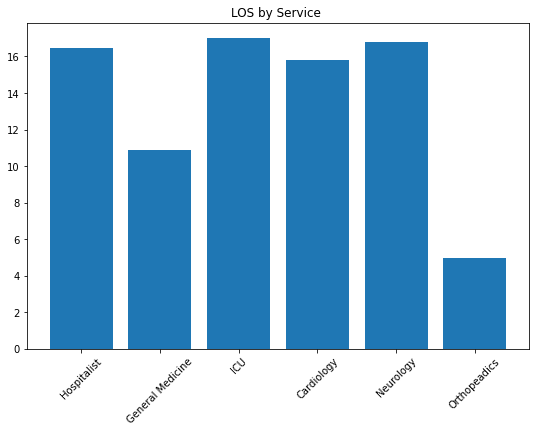

In [86]:
##55Create a bar chart on service & expected length of stay.

df = pd.read_excel("HospitalDatabase .xlsx","ReAdmissionRegistry")
plt.figure(figsize=(9,6))
plt.bar(x=df['Service'],
height=df['ExpectedLOS'])
plt.xticks(rotation=45)
plt.title('LOS by Service ')


Text(0.5, 1.0, 'ExpectedMortality by Service')

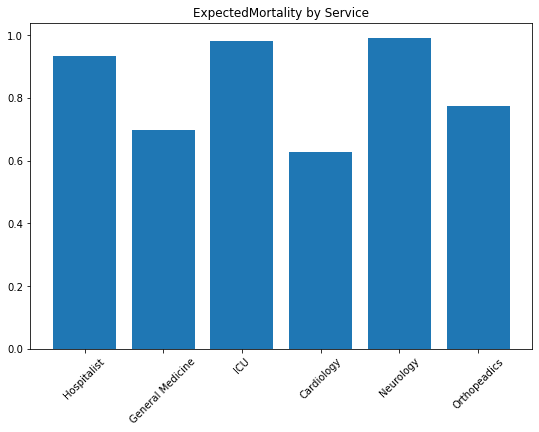

In [87]:
##33.Using a bar chart, which Service had the lowest count of Expected Mortality?


df = pd.read_excel("HospitalDatabase .xlsx","ReAdmissionRegistry")
rows_count = df1.count()
plt.figure(figsize=(9,6))
plt.bar(x=df['Service'],
height=df['ExpectedMortality'])
plt.xticks(rotation=45)
plt.title('ExpectedMortality by Service')


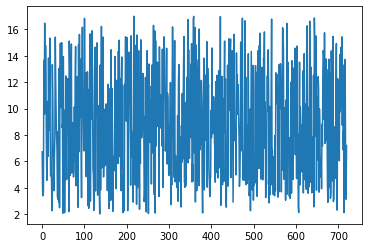

In [88]:
##16 Plot a graph to show the distribution of expected length of stay.

df = pd.read_excel("HospitalDatabase .xlsx","ReAdmissionRegistry")
df = df["ExpectedLOS"]
plt.plot(df)

In [89]:
###5.Display full name of patients who are born in 1986.

df = pd.read_excel("HospitalDatabase .xlsx","Patients")
df['FullName'] = df['FirstName'] + ' ' + df["LastName"]
df["DateOfBirthYear"] = pd.to_datetime(df["DateOfBirth"]).dt.year
df[df["DateOfBirthYear"] == 1986]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,FullName,DateOfBirthYear
23,24,Gabriel,Joseph,1986-05-31 09:36:05.716,Male,White,Spanish,Gabriel Joseph,1986
24,25,Lincoln,Brenda,1986-07-24 17:36:00.791,Male,White,Spanish,Lincoln Brenda,1986
29,30,Ala,Halpert,1986-11-26 10:44:22.628,Female,White,Spanish,Ala Halpert,1986
72,74,Lolita,Darci,1986-01-08 02:34:04.596,Female,White,Spanish,Lolita Darci,1986
164,165,Fadel,Bernardt,1986-05-29 00:35:58.694,Male,Black/African-American,English,Fadel Bernardt,1986
238,239,Bentley,Kippax,1986-02-11 06:22:40.734,Male,Black/African-American,English,Bentley Kippax,1986
367,368,Vale,Olanda,1986-04-15 00:49:58.690,Female,White,English,Vale Olanda,1986
373,374,Britt,Dureden,1986-11-19 23:50:47.955,Female,White,English,Britt Dureden,1986
386,387,Cristabel,Chatel,1986-07-10 16:27:30.640,Male,White,English,Cristabel Chatel,1986
415,416,Constantia,Group,1986-03-26 06:37:22.525,Female,White,English,Constantia Group,1986


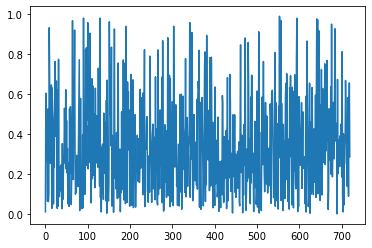

In [90]:
##70.Plot a graph to show the distribution of expected mortality.

df = pd.read_excel("HospitalDatabase .xlsx","ReAdmissionRegistry")
df = df["ExpectedMortality"]
plt.plot(df)

In [91]:
##56.Count of canceled status.


df = pd.read_excel("HospitalDatabase .xlsx","AmbulatoryVisits")
df1 = df[ (df["VisitStatus"] == 'Canceled')]
rows_count = df1.count()[0]
print('Number of Rows count is:', rows_count )


Number of Rows count is: 60


In [93]:
##73. . Delete the column 'DischargeDispostion' iteratively.
df2=ReAdmissionRegistry.drop(["DischargeDisposition"], axis = 1)
df2.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
